# 2023년 2학기 Python Programming HW2 중간 과제

- 분반: 01
- 이름: 황민상
- 학번: 20180653

In [ ]:
from typing import *

Merge two sorted lists into one sorted list.

In [ ]:
def merge(ls: list, rs: list) -> list:
    ss = []
    while ls!=[] and rs!=[]: #전달받은 배열들이 빈배열이 아닌 동안에
        if ls[0] <= rs[0]:
            ss.append( ls[0] )  # ss = ss + [ ls[0] ]
            ls = ls[1:]
        else: # left[0] > right[0]
            ss.append( rs[0] )  # ss = ss + [ rs[0] ]
            rs = rs[1:]
    # left==[] or right==[]
    return ss + ls + rs #ls, rs의 길이가 다를 수도 있으므로 작은것들을 넣은 ss, 작은것들로 정렬된 ls, 그 이후의 값들 rs.

Top-down merge sort

In [ ]:
def mergesort(xs: list) -> list: # top down merge sort 아무 배열을 입력 받고
    if len(xs) > 1:
        mid = len(xs) // 2 # 중간 위치를 저장
        return merge( mergesort(xs[:mid]), mergesort(xs[mid:]) ) #처음~중간 까지, 중간에서 ~ 끝까지를 정렬한 후 병합하기 위해 합수로 전달
    else: # len(xs) <= 1
        return xs

## Two styles of Merge functions (30점 = 15점 + 15점)
Merge pairs of adjecnt lists in a list of lists (`xss`).
- `mergeAdj` is a recursive function returning a new list while keeping the input argument `xss` unchanged. Does not have to be tail reucrisive.
    - Inductive case is when the length of `xss` is greter than 1.
    - Base case is when the length of `xss` is less than or equal to 1. In this case, the function may return `xss` itself instead of its copy.
- `mergeAdjacent` updates the input argument `xss`. Length of `xss` will be halved after executing this fuction. Write the function using loops (`whlie`, `for`).

In [ ]:
# merge 함수 등을 활용하여 재귀함수로 작성 (꼬리재귀는 아니라도 됨)
def mergeAdj(xss: list[list]) -> list[list]:
    if len(xss) > 1:
      new_list = []
      for idx in range(0,len(xss),2):
        if idx + 1 < len(xss):
          temp_list = merge(xss[idx], xss[idx + 1])
          new_list.append(temp_list)
        else:
          new_list.append(xss[idx])
      return mergeAdj(new_list)
        #pass # write code for inductive case
    else: # len(xss)
      return xss
        #pass # wrtie code for base case

In [ ]:
# do tests for mergeAdj
ex_list = [[1,2,3],[5,6,7],[17,21,23]]
print(mergeAdj(ex_list))

[[1, 2, 3, 5, 6, 7, 17, 21, 23]]


In [ ]:
def mergeAdjacent(xss: list[list]) -> list[list]:
      new_list = []
      for idx in range(0,len(xss),2):
        if idx + 1 < len(xss):
          temp_list = merge(xss[idx], xss[idx + 1])
          new_list.append(temp_list)
        else:
          if new_list != []:
            temp_list = merge(new_list[-1], xss[idx])
            new_list[-1] = temp_list
          else:
            new_list = xss[idx]
      return new_list
    #pass # merge 함수 등을 활용하여 while이나 for 등의 반복문으로 작성 (hint: merge from the last elements at the right end)

In [ ]:
ex_list = [[1,2,3],[5,6,7],[17,21,23],[24,25,26]]
print(mergeAdjacent(ex_list))
# do tests for mergeAdjacent

[[1, 2, 3, 5, 6, 7], [17, 21, 23, 24, 25, 26]]


## Bottom-up merge sort (20점)

In [ ]:
def msort(xs: list[list]) -> list[list]:
  if len(xs) > 1:
    mid = len(xs) // 2
    return mergeAdj(merge(msort(mergeAdjacent(xs[:mid])),msort(mergeAdjacent(xs[mid:]))))
  else:
    return xs
    #pass # write boottm-up merge sort using mergeAdjecent

In [ ]:
# do tests for msort
ex_list = [[1,2,60],[5,6,7],[24,25,26],[17,21,23],[28,30, 31]]
print(msort(ex_list))

[[1, 2, 5, 6, 7, 17, 21, 23, 24, 25, 26, 28, 30, 31, 60]]


## Visualize selection sort using ColabTurtlePlus (40점 = 15점 + 25점)

In [ ]:
!pip install ColabTurtlePlus

In [ ]:
# 참고자료 https://pythonturtle.academy/quick-sort-animation-with-python-and-turtle-with-source-code/

import ColabTurtlePlus.Turtle as turtle
import random
import time   # use time.sleep(secs) function for smooth visalization

# from (x,y) draw rectangle bar of width w and hight h
# Changes by this function will appear when turtle.update() is called
# DO NOT MODIFY THIS FUNCTION!!!
def draw_bar(x: int, y: int, w: int, h: int, color: str):
    turtle.fillcolor(color)
    turtle.up()
    turtle.goto(x,y)
    turtle.seth(0)
    turtle.down()
    turtle.begin_fill()
    turtle.fd(w)
    turtle.left(90)
    turtle.fd(h)
    turtle.left(90)
    turtle.fd(w)
    turtle.left(90)
    turtle.fd(h)
    turtle.left(90)
    turtle.end_fill()

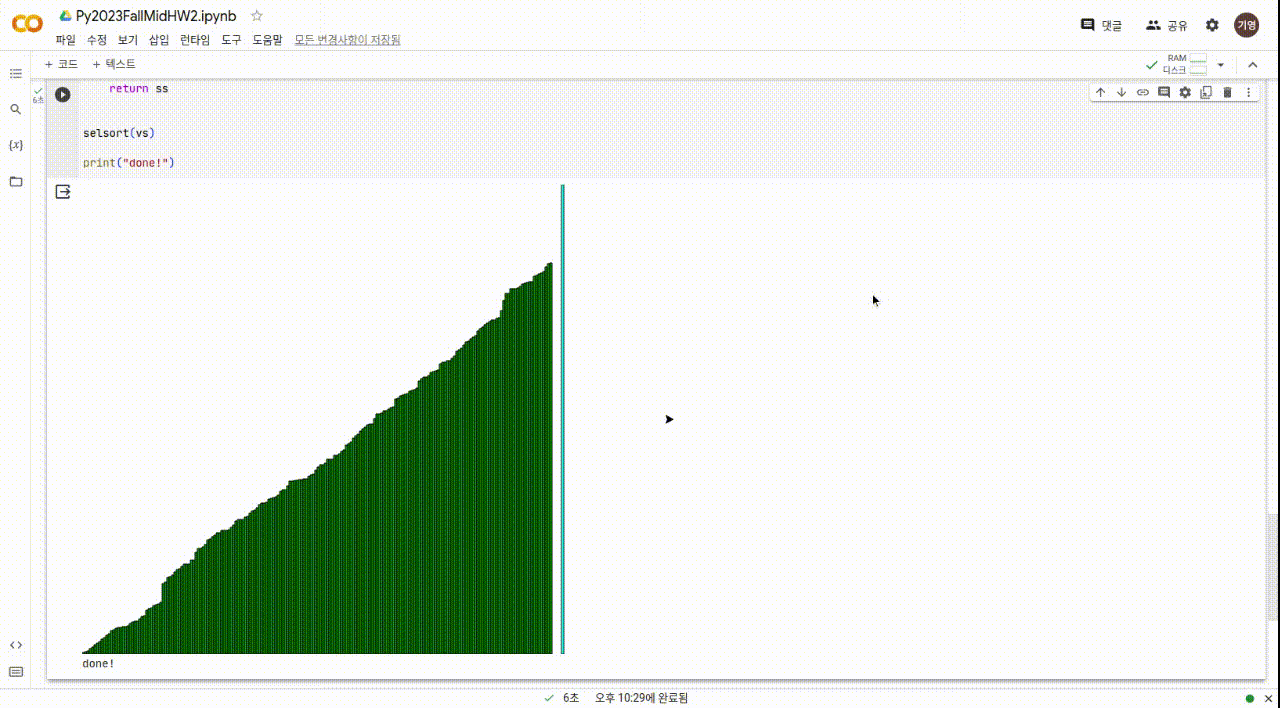

Complete the `draw_bars` function and modify the `selsort` to generate the animated GIF image above while running the `selsort` function.

In [ ]:
import ColabTurtlePlus.Turtle as turtle
import random
import time

# (x, y)에서 너비 w, 높이 h의 직사각형 바 그리기
def draw_bar(x, y, w, h, color):
    turtle.fillcolor(color)
    turtle.up()
    turtle.goto(x, y)
    turtle.seth(0)
    turtle.down()
    turtle.begin_fill()
    turtle.fd(w)
    turtle.left(90)
    turtle.fd(h)
    turtle.left(90)
    turtle.fd(w)
    turtle.left(90)
    turtle.fd(h)
    turtle.left(90)
    turtle.end_fill()
    turtle.update()

# 바 그리기
def draw_bars(vs, w, p0, color):
    max_height = max(vs)
    scale_factor = height / max_height
    x0, y0 = p0

    for val in vs:
        draw_bar(x0, y0, w, val * scale_factor, color)
        x0 += w

# 초기 설정
turtle.initializeTurtle()
turtle.speed(0)
turtle.hideturtle()

width = 1500
height = 600
turtle.setup(width, height)

n = 200
vs = [random.randint(1, height - 100) for _ in range(n)]
draw_bars(vs, 3, (-width / 2, -height / 2), 'gray')

def selsort(vs: list) -> list:
    ss = []
    while vs != []:
        smallest = min(vs)
        vs.remove(smallest)
        ss.append(smallest)
        draw_bar(width / 2 - 3 * len(ss), -height / 2, 3, smallest, 'green')
        draw_bar(-width / 2 + 3 * len(ss), -height / 2, 3, 0, 'gray')
    return ss

selsort(vs)

print("완료!")
turtle.done()


완료!


## Visualize merge function (20점)

Write a function `merge_viz` which includes the same code as
the `merge` function above, but adds the side effect for visuzlization using the turtle api.

Write three tests genreated using random functions,
each of which visializes one of the following scenarios:
- first sorted list is consumed much more earlier,
- second sorted list is consumed much more earlier, and
- two sorted list is consumed similarly (like the example animated gif below).

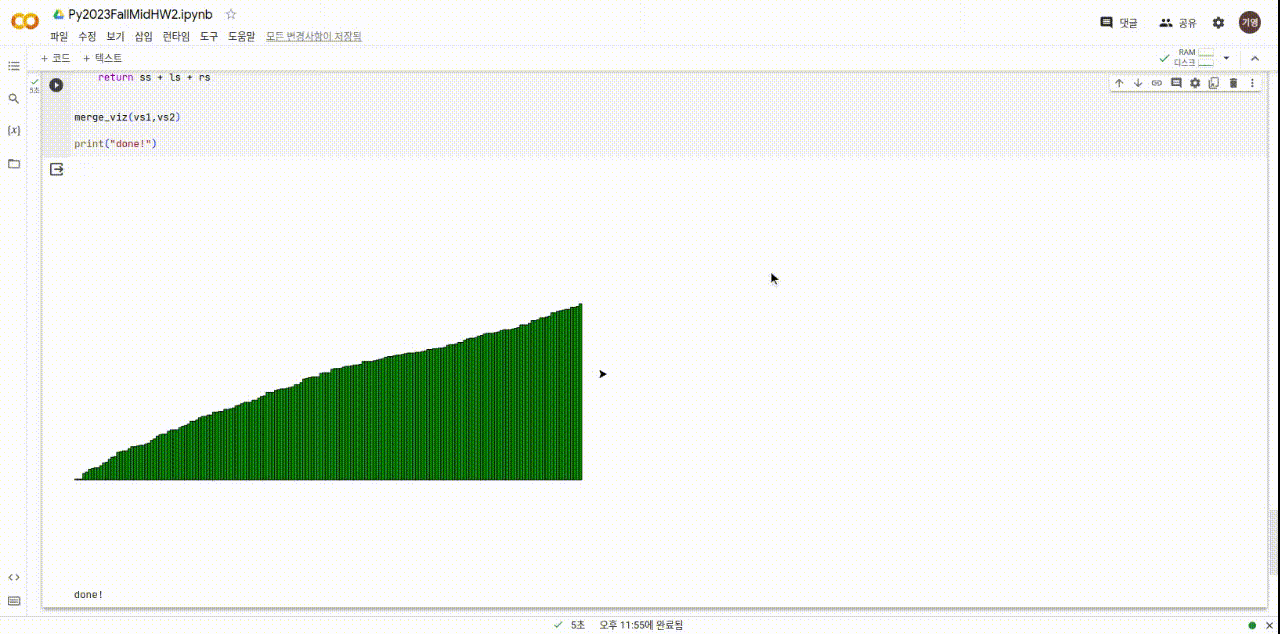